# Solving Linear Programming using cvxpy

Here, we use the library, **cvxpy** to find the solution of the linear programming problem (LPP).

To install this library, use the following command:

In [ ]:
!pip install cvxpy


In [ ]:
import cvxpy as cp
import numpy as np

## EXAMPLE 1

# Problem

Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=x_1+x_2 \\
\text{subject to } & 4x_1+3x_2 \leq 12\\
& -3x_1+4x_2\leq 12 \\
& 0\leq x_1,\ x_2 \leq 2\end{matrix}$$

The expected solution is $z=3.5$ where $x_1=1.5,\ x_2=2$.

## CODE

# Step 1: First define the number of variables that would be used

For example, if only two $x_is$ would be used,

This line creates a column matrix of dimensions $2\times 1$ (in a general case, if $n$ is the number of linear programming variables, then a column matrix of dimensions $n \times 1$ should be made.)

In [21]:
x = cp.Variable(shape=(2,1), name="x")

# Step 2: Define the constraints

Here the constraints are as follows
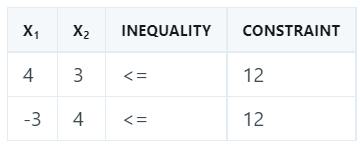

All values of x lie between 0 and 2 both inclusive.

In [22]:
A = np.array([[4,3],[-3,4]])
constraints = [cp.matmul(A, x) <= 12, x<=2, x>=0]

The above lines first make a $2 \times 2$ matrix (as described in the table above). Since both of their constraints are the same, we can define the constraint in a single line, by making the matrix $<= 12$.

Multiple constraints on both the variables can be defined using $x$ as a general variable.

For defining multiple single lined distinct constraints, use the following format:
$$A x <= B$$

Where $<=$ can be replaced by any other inequality symbol.

Here A is a square matrix of dimensions $n \times n$ where n is the number of varibles in the linear programming problem, x is as defined in the previous step, and B is a column matrix of dimensions $n \times 1$.

For example, for defining the following constraints, use the following snippet: ($n = 3$)
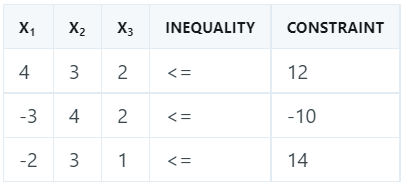

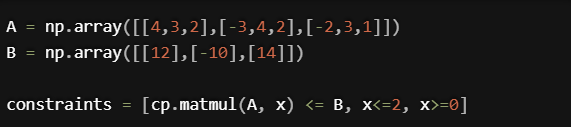

# Step 3: Define the objective function

Here the objective function is $z = x_1 + x_2$.

In [23]:
objective = cp.Maximize(cp.sum(x, axis=0))

For an objective function $z = 3x_1 + 4x_2$, define a new 1 dimensional array containing the different parameters in the objective function as follows:

In [24]:
r = np.array([3,4])
objective = cp.Maximize(cp.matmul(r, x))

# Step 4: Define the problem and then solve it

The problem is defined by the objective function and the constraints.

In [25]:
problem = cp.Problem(objective, constraints)
solution = problem.solve()


# Step 5: Print the maximised objective funstion, and the x values

Here, solution contains the value of the objective function, and x.value is the column matrix, containing the values of $x_i$.

In [26]:
print(solution)
print(x.value)


12.499999998835435
[[1.5]
 [2. ]]


# Final code

In [27]:
import cvxpy as cp
import numpy as np

x = cp.Variable(shape=(2,1), name="x")
A = np.array([[4,3],[-3,4]])

constraints = [cp.matmul(A, x) <= 12, x<=2, x>=0]
objective = cp.Maximize(cp.sum(x, axis=0))
problem = cp.Problem(objective, constraints)

solution = problem.solve()
print(solution)
print(x.value)


3.499999999929633
[[1.5]
 [2. ]]


Here the first line denotes the solution while the next two lines denote the values of the two parameters.



# EXAMPLE 2

# Problem

Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=4x_1+2x_2 \\ 
\text{subject to} & 4x_1+3x_2 \leq 12 \\
& -3x_1 + 6x_2 \leq 10 \\
& x_1 \geq 1\\
& 0\leq x_1,\ \ x_2 \leq 5\end{matrix}$$

The expected solution is $z=4.0$ where $x_1=1,\ x_2=0$.

In [8]:
# TO DO
import cvxpy as cp
import numpy as np
c = np.array([4,2])
A = np.array([[4,3],[-3,6]])
b = np.array([12,10])
x = cp.Variable(2)
constraint = [A@x <= b, x[0]>=1, x[1]<=5,x[1]>=0]

prob = cp.Problem(cp.Minimize(c.T @ x),constraint)
prob.solve()

print(prob.value)


4.000000000048356


# EXAMPLE 3


Solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x,\ y} & z=x+2y \\ 
\text{subject to} & 2x+y \leq 20 \\
& 4x - 5y \geq -10 \\
& -x+2y \geq -2\\
& x,\ y \geq 0\end{matrix}$$

In [12]:
# TO DO

import cvxpy as cp
import numpy as np
c = np.array([1,2])
A = np.array([[2,1],[-4,5],[1,-2]])
b = np.array([20,10,2])
x = cp.Variable(2)
constraint = [A@x <= b, x >= 0]

prob = cp.Problem(cp.Minimize(c.T @ x),constraint)
prob.solve()

print(prob.value)

3.702581866853527e-11


# Example 4

Solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x,\ y} & z=40x+90y \\ 
\text{subject to} & 9x+7y \leq 56 \\
& 7x + 20y \geq 70 \\
& x,\ y \geq 0\end{matrix}$$

# Exercise:
Using cvxpy to solve **Example 2, 3, and 4**.